# Лабораторная работа №7. Классификация

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в виде файла rep.ipynb в ваш репозиторий github в директорию ./les07
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Используя набор данных titanic.csv постройте модель предсказывающую выжил или погиб пассажир. 
1.	PassengerId – Идентификатор пассажира (уникальный номер для каждого пассажира).
2.	Survived – Выжил (0 – не выжил, 1 – выжил).
3.	Pclass – Класс пассажира (1 – первый класс, 2 – второй класс, 3 – третий класс).
4.	Name – Имя (полное имя пассажира).
5.	Sex – Пол (male – мужчина, female – женщина).
6.	Age – Возраст (числовое значение, может быть дробным).
7.	SibSp – Количество родственников на борту (братьев, сестер или супругов).
8.	Parch – Количество родителей или детей на борту.
9.	Ticket – Номер билета.
10.	Fare – Стоимость билета (в фунтах стерлингов).
11.	Cabin – Номер каюты (может быть пропущен, если данные отсутствуют).
12.	Embarked – Порт посадки (C – Cherbourg, Q – Queenstown, S – Southampton).

In [1]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.13.2 (tags/v3.13.2:4f8bb39, Feb  4 2025, 15:23:48) [MSC v.1942 64 bit (AMD64)]
Numpy version: 2.3.5
Pandas version: 3.0.0
Matplotlib version: 3.10.8


## Извлечение данных

1. Создайте DataFarame из файла titanic.csv, в качестве индекса используйте столбец "PassengerId".

In [2]:
url = 'https://raw.githubusercontent.com/Yuu314/dap-2024/main/les07/data/titanic.csv'
titanic_df = pd.read_csv(url, index_col='PassengerId')
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


2. Выведете первые 7 строк набора.

In [3]:
titanic_df = pd.read_csv(url, index_col='PassengerId')
titanic_df.head(7)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


### Подготовка данных

3. Выведете информацию о типах данных в наборе. Имеются ли в наборе не числовые признаки? Имеются ли в наборе данные имеющие значение null? 
    

In [4]:
print(f"Информация о типах данных: \n{titanic_df.info()}")
print(f"Количество пропущенных значений в каждом столбце: \n{titanic_df.isnull().sum()}")

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    str    
 3   Sex       891 non-null    str    
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    str    
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    str    
 10  Embarked  889 non-null    str    
dtypes: float64(2), int64(4), str(5)
memory usage: 76.7 KB
Информация о типах данных: 
None
Количество пропущенных значений в каждом столбце: 
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


4. Удалите не числовые признаки, которые по вашему мнению, не могут влиять на заначение выжил или погиб пассажир.

In [5]:
columns_to_drop = ['Ticket', 'Cabin']
titanic_df_cleaned = titanic_df.drop(columns=columns_to_drop)
print(f"Оставшиеся столбцы: \n{titanic_df_cleaned.columns}")

Оставшиеся столбцы: 
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='str')


5. Вместо признака "Sex" (я надеюсь вы его не удалили 😂) Создайте два новых признака male и female которые содержат значения 0 или 1.

In [6]:
titanic_df['male'] = (titanic_df['Sex'] == 'male').astype('float64')
titanic_df['female'] = (titanic_df['Sex'] == 'female').astype('float64')
titanic_df = titanic_df.drop(columns=['Sex'])
titanic_df

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,female
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0.0,1.0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0.0,1.0
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1.0,0.0
888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0.0,1.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0,1.0


6. Удалите строки, которые содержать хотя бы одно null значение.

In [7]:
titanic_df_cleaned = titanic_df_cleaned.dropna()
print(f"Количество строк после удаления null значений: {len(titanic_df_cleaned)}")
titanic_df_cleaned

Количество строк после удаления null значений: 712


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S


## Исследование данных

4. Нормализуйте значения признака "Fare".

In [8]:
titanic_df_fare_age=titanic_df[['Age','Fare']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(titanic_df_fare_age)
titanic_df_fare_age = pd.DataFrame(scaled_data, columns=["Age","Fare"], index = titanic_df.index)
titanic_df = titanic_df[['Survived','Pclass','SibSp','Parch','female','male']].join(titanic_df_fare_age)
titanic_df.describe()

,Survived,Pclass,SibSp,Parch,female,male,Age,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,7.140000e+02,8.910000e+02
mean,0.383838,2.308642,0.523008,0.381594,0.352413,0.647587,2.388379e-16,3.987333e-18
std,0.486592,0.836071,1.102743,0.806057,0.477990,0.477990,1.000701e+00,1.000562e+00
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-2.016979e+00,-6.484217e-01
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-6.595416e-01,-4.891482e-01
50%,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,-1.170488e-01,-3.573909e-01
75%,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000,5.718310e-01,-2.424635e-02
max,1.000000,3.000000,8.000000,6.000000,1.000000,1.000000,3.465126e+00,9.667167e+00


5. Найдите разницу между средними значениями признака "Fare" для погибших и выживших пассажиров.

In [9]:
titanic_df.pivot_table('Fare', columns='Survived', aggfunc='mean')

Survived,0,1
Fare,-0.203085,0.326005


6. Простройте на одной оси координат гистограмы значений признака "Fare" для погибших и выживших пассажиров.

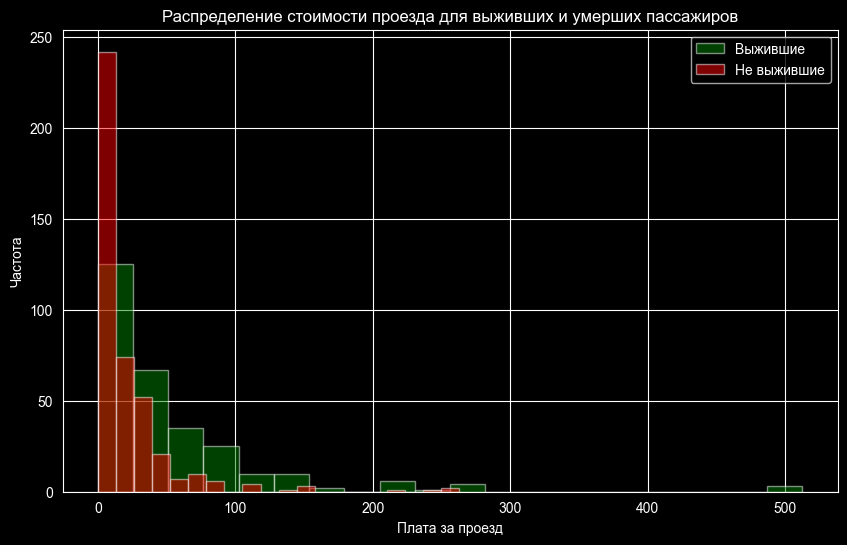

In [10]:
survived = titanic_df_cleaned[titanic_df_cleaned['Survived'] == 1]['Fare']
died = titanic_df_cleaned[titanic_df_cleaned['Survived'] == 0]['Fare']


plt.figure(figsize=(10, 6))
plt.hist(survived, bins=20, alpha=0.5, label='Выжившие', color='green')
plt.hist(died, bins=20, alpha=0.5, label='Не выжившие', color='red')

plt.title('Распределение стоимости проезда для выживших и умерших пассажиров')
plt.xlabel('Плата за проезд')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()

7. Сформируйте набор признаков (X). Сформируйте вектор целевых значений (y).

In [11]:
X = titanic_df_cleaned.drop('Survived', axis=1)
y = titanic_df_cleaned['Survived']

## Предсказательная модель

8. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [12]:
from sklearn.model_selection import train_test_split

X = titanic_df_cleaned.drop('Survived', axis=1)
y = titanic_df_cleaned['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"\nРазмер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер обучающей выборки: (534, 8)
Размер тестовой выборки: (178, 8)


9. Выполните обучение модели.

In [13]:
print(X_train.dtypes)
X_train = X_train.select_dtypes(include=['int64', 'float64'])
X_test = X_test.select_dtypes(include=['int64', 'float64'])
X_train, X_test = X_train.align(X_test, join='inner', axis=1)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4, algorithm='auto')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Pclass        int64
Name            str
Sex             str
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked        str
dtype: object


## Проверка модели

10. Выведите мартицу ошибок

In [14]:
from sklearn.metrics import confusion_matrix
model_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
model_matrix_df = pd.DataFrame(model_matrix)
model_matrix_df

,0,1
0,74,25
1,41,38


11. Расчитайте accuracy

In [15]:
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test, y_pred)
round(model_accuracy,2)

0.63

12. Сделайте вывод о полученном результате

Вывод: Точность модели составляет 63%, что указывает на относительно низкую эффективность предсказаний. Это может быть связано с проблемами в данных, недостаточной обученностью модели или нерелевантными признаками. Точность модели может быть улучшена с помощью подбора признаков и других алгоритмов обучения.

## Вопросы для защиты

1. **Сформулируйте задачу классификации.**

Задача классификации — задача, в которой множество объектов (ситуаций) необходимо разделить некоторым образом на классы, при этом задано конечное множество объектов, для которых известно, к каким классам они относятся (выборка), но классовая принадлежность остальных объектов неизвестна. Для решения задачи требуется построить алгоритм, способный классифицировать произвольный объект из исходного множества, то есть указать, к какому классу он относится.

---
2. **Перечислите типы классификации.**
+ Бинарная классификация
+ Мультиклассовая классификация
+ Несбалансированная классификация

---
3. **В чем особенность несбалансированной классификации?**

Особенность в том, что классы представлены в данных непропорционально (один класс значительно преобладает над другими). Это требует специальных методов обработки: взвешивание классов, oversampling/undersampling, использование специальных метрик.

---
4. **В чем особенность мультиклассовой классификации?**

Особенность в наличии трех и более взаимно исключающих классов. Требует использования специальных стратегий: "один против всех" (One-vs-Rest) или "один против одного" (One-vs-One).

---
5. **В чем особенность бинарной классификации?**

Особенность в наличии только двух классов (например: спам/не спам, выжил/погиб). Является наиболее изученным и распространенным типом классификации.

---
6. **В чем особенность классификации по нескольким меткам?**

Особенность в том, что один объект может одновременно принадлежать нескольким классам (например: статья может относиться к категориям "политика", "экономика", "международные отношения").

---
7. **Чем стратегия "Один против всех" отличается от стратегии "Один против одного"?**
+ Один против всех: Для каждого класса строится бинарный классификатор, который отличает этот класс от всех остальных
+ Один против одного: Для каждой пары классов строится отдельный классификатор
---
8. **Что такое матрица ошибок (несоответствий)?**

Матрица ошибок - это таблица, которая показывает распределение предсказаний модели по сравнению с фактическими значениями. Содержит четыре показателя:

+ True Positive (TP)
+ True Negative (TN)
+ False Positive (FP)
+ False Negative (FN)
---
9. **Как рассчитывается Accuracy?**

Accuracy = (TP + TN) / (TP + TN + FP + FN) Показывает долю правильных предсказаний среди всех предсказаний.

---
10. **Объясните алгоритм классификации K-ближайших соседей.**

Алгоритм KNN относит объект к тому классу, к которому принадлежит большинство из k его ближайших соседей в пространстве признаков. Основные этапы:

+ Выбор метрики расстояния (евклидово, манхэттенское и др.)
+ Выбор числа соседей k
+ Поиск k ближайших объектов
+ Голосование: объект относится к классу, который преобладает среди соседей